<a href="https://colab.research.google.com/github/Arwah45/BokehEffect/blob/main/BokehEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary dependencies (if not already installed)
!pip install diffusers transformers accelerate pillow rembg opencv-python-headless

# Import necessary libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image, ImageFilter
from rembg import remove
import numpy as np
import cv2

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to(device)

# Generate an image from a text prompt
prompt = "an astronaut floating in space "
image = pipe(prompt).images[0]

# Save and display the original generated image
image.save("generated_image.png")
image.show()

# Remove background from the image
foreground = remove(image)

# Convert the original image to a format compatible with OpenCV
background_cv = np.array(image)
background_cv = cv2.cvtColor(background_cv, cv2.COLOR_RGB2BGR)

# Apply a blur to the background
blurred_background = cv2.GaussianBlur(background_cv, (15, 15), 0)

# Convert the blurred background back to PIL format
blurred_background_pil = Image.fromarray(cv2.cvtColor(blurred_background, cv2.COLOR_BGR2RGB))

# Combine the foreground (with background removed) with the blurred background
final_image = Image.composite(foreground, blurred_background_pil, foreground)

# Save and display the final image with the blurred background
final_image.save("blurred_background_image.png")
final_image.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 126GB/s]


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt # import matplotlib


In [ ]:
# Display the original and final images using matplotlib
plt.figure(figsize=(12, 6))



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(-0.5, 511.5, 511.5, -0.5)

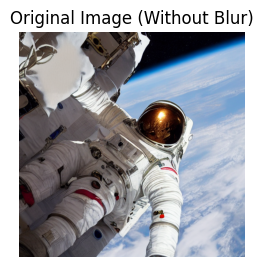

In [ ]:
# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image (Without Blur)")
plt.axis('off')

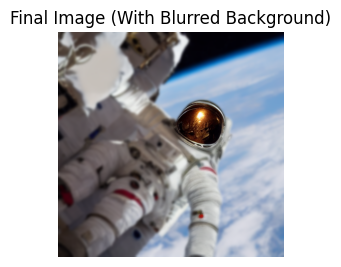

In [ ]:
# Display final image with blurred background
plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title("Final Image (With Blurred Background)")
plt.axis('off')

# Show both images
plt.show()